# Assignment 3b

Initial setup code:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [2]:
filename = 'mutations.csv'
data = pd.read_csv(filename, index_col=0)
samples = data.shape[0]
data.head()

,ANKRD26_GRCh37_10:27322259-27322259_Frame-Shift-Del_DEL_T-T--,ARID5B_GRCh37_10:63850705-63850705_Frame-Shift-Del_DEL_A-A--,PTEN_GRCh37_10:89717770-89717770_Frame-Shift-Del_DEL_A-A--,C11orf70_GRCh37_11:101937275-101937275_Frame-Shift-Del_DEL_T-T--,LRRC43_GRCh37_12:122685346-122685346_Frame-Shift-Del_DEL_C-C--,FARP1_GRCh37_13:99092237-99092237_Frame-Shift-Del_DEL_G-G--,SNAPC1_GRCh37_14:62242911-62242911_Frame-Shift-Del_DEL_T-T--,ZC3H18_GRCh37_16:88691141-88691141_Frame-Shift-Del_DEL_C-C--,KIF2B_GRCh37_17:51901904-51901904_Missense-Mutation_SNP_C-C-T,KIF2B_GRCh37_17:51902014-51902014_Frame-Shift-Del_DEL_A-A--,...,PWWP2B_GRCh37_10:134230688-134230688_3'UTR_DEL_C-C--,DPYSL2_GRCh37_8:26513311-26513311_3'UTR_SNP_T-T-G,NME5_GRCh37_5:137451362-137451362_3'UTR_DEL_T-T--,MGP_GRCh37_12:15035053-15035053_3'UTR_DEL_T-T--,NAP1L1_GRCh37_12:76442093-76442093_3'UTR_DEL_A-A--,SYTL1_GRCh37_1:27680355-27680356_3'UTR_DEL_CT-CT--,LRIT1_GRCh37_10:85991648-85991648_3'UTR_SNP_G-G-T,PLK4_GRCh37_4:128819735-128819735_3'UTR_DEL_T-T--,ZBED6CL_GRCh37_7:150028250-150028250_3'UTR_SNP_C-C-T,TERF2IP_GRCh37_16:75690558-75690558_3'UTR_DEL_A-A--
C0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Create the DataFrame Chart
chart_df = pd.DataFrame(columns=['T'])
chart_df.iloc[:, 0] = data.iloc[0]
chart_df.index.name = 'Genetic Mutation (Feature)'

### Do the math for each ###

# Just add all the 1's
chart_df['T'] = data.sum(axis=0) 
chart_df = chart_df.sort_values(by=['T'], ascending=False)
chart_df.head(2)
top_mutations = chart_df.head(2).index.values
print(top_mutations)

['ACVR2A_GRCh37_2:148683686-148683686_Frame-Shift-Del_DEL_A-A--'
 'RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--']


## Actual vs Predicted chart for the tops mutation

In [4]:
actual_predicted_chart_1 = pd.DataFrame(index=data.index, columns=['Actual', 'Predicted'])
# Values where the sample starts with 'C', indicating the sample has cancer
actual_predicted_chart_1['Actual'] = data.index.str.startswith('C').astype(int)
# # Values where the patient has the cancer mutation
actual_predicted_chart_1['Predicted'] = data[top_mutations[0]]
sum_of_pred = actual_predicted_chart_1['Predicted'].sum() # It's always gonna be 12 but I'm doing it for the sake of sanity

# Confirm it works
actual_predicted_chart_1.name = f"Actual vs Predicted for {top_mutations[0]}"
print(actual_predicted_chart_1.name)
actual_predicted_chart_1.sort_values(by=['Predicted'], ascending=False).head(sum_of_pred)

Actual vs Predicted for ACVR2A_GRCh37_2:148683686-148683686_Frame-Shift-Del_DEL_A-A--


,Actual,Predicted
C4,1,1
C11,1,1
C13,1,1
C40,1,1
C27,1,1
C44,1,1
C34,1,1
C43,1,1
NC57,0,1
C47,1,1


In [5]:
actual_predicted_chart_2 = pd.DataFrame(index=data.index, columns=['Actual', 'Predicted'])
# Values where the sample starts with 'C', indicating the sample has cancer
actual_predicted_chart_2['Actual'] = data.index.str.startswith('C').astype(int)
# # Values where the patient has the cancer mutation
actual_predicted_chart_2['Predicted'] = data[top_mutations[1]]
sum_of_pred = actual_predicted_chart_2['Predicted'].sum() # It's always gonna be 12 but I'm doing it for the sake of sanity


# Confirm it works
actual_predicted_chart_2.name = f"Actual vs Predicted for {top_mutations[1]}"
print(actual_predicted_chart_2.name)
actual_predicted_chart_2.sort_values(by=['Predicted'], ascending=False).head(sum_of_pred)

Actual vs Predicted for RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--


,Actual,Predicted
C4,1,1
C3,1,1
C7,1,1
C10,1,1
C44,1,1
C29,1,1
NC54,0,1
C43,1,1
C46,1,1
C47,1,1


## Make the Relevant Confusion Matrices

In [6]:
confusion_matrix_1 = pd.crosstab(actual_predicted_chart_1['Actual'], actual_predicted_chart_1['Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_1.name = f"Confusion Matrix for {top_mutations[0]}"

print(confusion_matrix_1.name)
confusion_matrix_1


Confusion Matrix for ACVR2A_GRCh37_2:148683686-148683686_Frame-Shift-Del_DEL_A-A--


Predicted,0,1
Actual,,
0,60,1
1,38,11


In [7]:
confusion_matrix_2 = pd.crosstab(actual_predicted_chart_2['Actual'], actual_predicted_chart_2['Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_2.name = f"Confusion Matrix for {top_mutations[1]}"

print(confusion_matrix_2.name)
confusion_matrix_2

Confusion Matrix for RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--


Predicted,0,1
Actual,,
0,60,1
1,38,11


# Make the Stacked Bar Charts

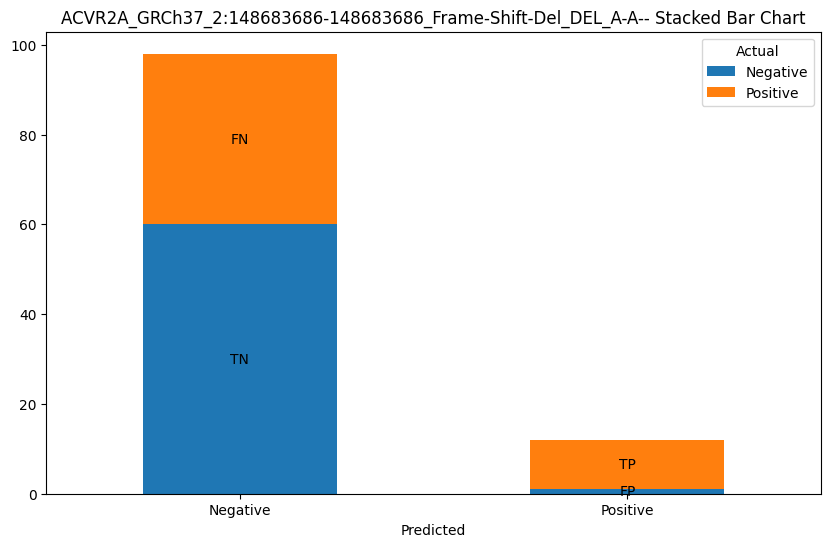

In [8]:
# Transpose the confusion matrix to flip predicted and actual
confusion_matrix_1 = confusion_matrix_1.T

# Rename the columns and index
confusion_matrix_1.columns = ['Negative', 'Positive']
confusion_matrix_1.index = ['Negative', 'Positive']

# Stacked Bar Chart
ax = confusion_matrix_1.plot(kind='bar', stacked=True)
ax.set_xlabel('Predicted')  # Set the x-axis label to Predicted
ax.legend(title='Actual')  # Set the legend title to Actual
plt.xticks(rotation=0)  # Make the x-axis labels horizontal
plt.gcf().set_size_inches(10, 6)

# Label in the middle of the bar
for i in range(len(confusion_matrix_1.index)):
    cumulative_height = 0
    for j in range(len(confusion_matrix_1.columns)):
        height = confusion_matrix_1.iloc[i, j]
        if height > 0:  # Only add label if height is greater than 0
            if j == 1:  # Positive column
                label = 'TP' if i == 1 else 'FN'
            else:  # Negative column
                label = 'TN' if i == 0 else 'FP'
            ax.text(i, cumulative_height + height / 2, f"{label}", ha='center', va='center', color='black')
            cumulative_height += height  # Update the cumulative height for the next bar

# Add title
plt.title(f'{top_mutations[0]} Stacked Bar Chart')

# Show the plot
plt.show()

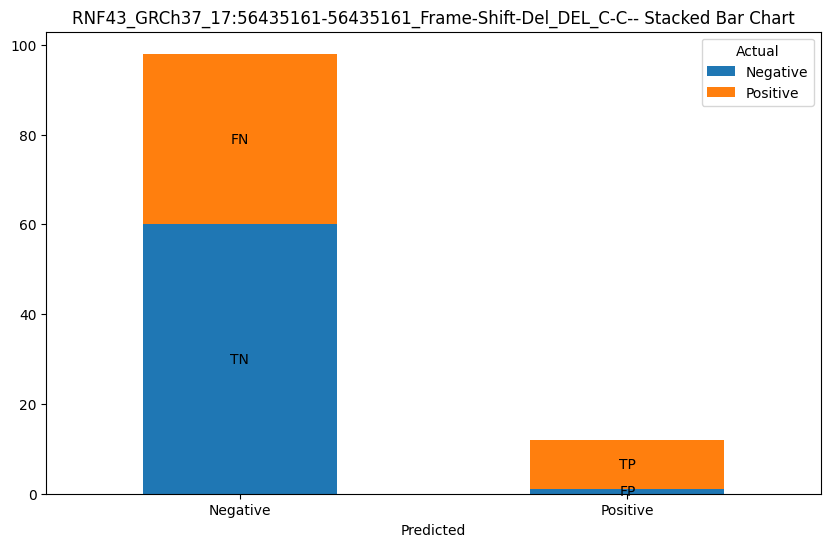

In [9]:
# Transpose the confusion matrix to flip predicted and actual
confusion_matrix_2 = confusion_matrix_2.T

# Rename the columns and index
confusion_matrix_2.columns = ['Negative', 'Positive']
confusion_matrix_2.index = ['Negative', 'Positive']

# Stacked Bar Chart
ax = confusion_matrix_2.plot(kind='bar', stacked=True)
ax.set_xlabel('Predicted')  # Set the x-axis label to Predicted
ax.legend(title='Actual')  # Set the legend title to Actual
plt.xticks(rotation=0)  # Make the x-axis labels horizontal
plt.gcf().set_size_inches(10, 6)

# Label in the middle of the bar
for i in range(len(confusion_matrix_2.index)):
    cumulative_height = 0
    for j in range(len(confusion_matrix_2.columns)):
        height = confusion_matrix_2.iloc[i, j]
        if height > 0:  # Only add label if height is greater than 0
            if j == 1:  # Positive column
                label = 'TP' if i == 1 else 'FN'
            else:  # Negative column
                label = 'TN' if i == 0 else 'FP'
            ax.text(i, cumulative_height + height / 2, f"{label}", ha='center', va='center', color='black')
            cumulative_height += height  # Update the cumulative height for the next bar

# Add title
plt.title(f'{top_mutations[1]} Stacked Bar Chart')

# Show the plot
plt.show()

# Make the Donut Charts

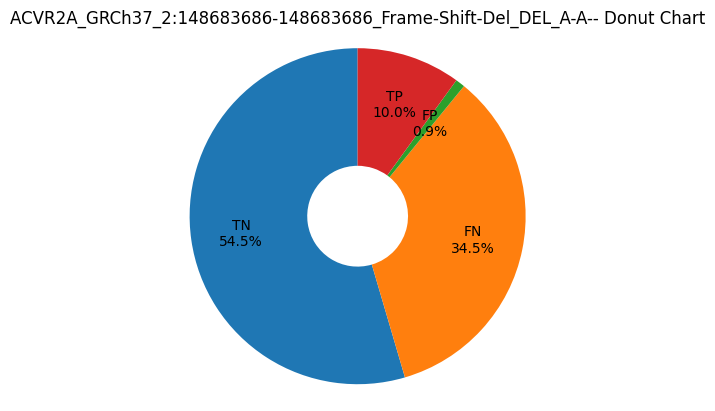

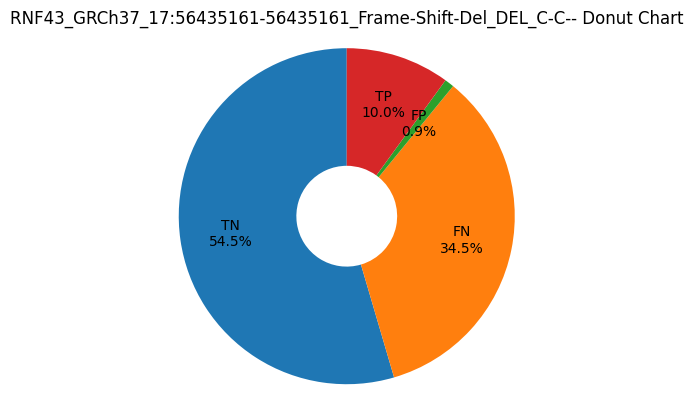

In [10]:
# Function to format the labels with both the label and the percentage
def func(pct, allvals, labels):
    if pct > 0.1:  # Only show percentages greater than 0.1%
        absolute = float(pct/100.*sum(allvals))
        rounded_vals = [round(val, 2) for val in allvals]
        index = rounded_vals.index(round(absolute, 2)) if absolute > 0 else -1
        label = labels[index] if index != -1 else ''
        return f"{label}\n{pct:.1f}%"
    else:
        return ''

# Function to determine the labels based on the confusion matrix
def determine_labels(confusion_matrix):
    labels = []
    for i in range(len(confusion_matrix.index)):
        for j in range(len(confusion_matrix.columns)):
            if j == 1:  # Positive column
                label = 'TP' if i == 1 else 'FN'
            else:  # Negative column
                label = 'TN' if i == 0 else 'FP'
            labels.append(label)
    return labels

# Donut chart 1
# Flatten the confusion matrix into a list of values
values1 = confusion_matrix_1.values.flatten()

# Determine the labels for the first donut chart
labels1 = determine_labels(confusion_matrix_1)

# Create the first donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values1, autopct=lambda pct: func(pct, values1, labels1), startangle=90, wedgeprops=dict(width=0.7), pctdistance=0.7, labeldistance=1.1)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add title
plt.title(f'{top_mutations[0]} Donut Chart')

# Show the plot
plt.show()

# Donut chart 2
# Flatten the confusion matrix into a list of values
values2 = confusion_matrix_2.values.flatten()

# Determine the labels for the second donut chart
labels2 = determine_labels(confusion_matrix_2)

# Create the second donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values2, autopct=lambda pct: func(pct, values2, labels2), startangle=90, wedgeprops=dict(width=0.7), pctdistance=0.7, labeldistance=1.1)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add title
plt.title(f'{top_mutations[1]} Donut Chart')

# Show the plot
plt.show()

# Which is a better indentifier (from DOCK3 and RNF43)?
The best identifier seems to be DOCK3 as there were no false negatives while there was one for RNF43. Additionally, it correctly identified 12 samples as cancerous based on just having this mutation. Finally, DOCK3 also had the least amount of false positives. There were 0 false positives while RNF43 has 1 false positive.

# Now which is the best overall (out of all mutations)?

In [11]:
mutation_data = []

for mutation in data:
    curr_tp, curr_fp = 0, 0
    for index in data.index:
        if data[mutation][index] == 1:
            if index.startswith('C'):
                curr_tp += 1
            else:
                curr_fp += 1
    # print(f"Mutation: {mutation}")
    # print(f"True Positive: {curr_tp}")
    # print(f"False Positive: {curr_fp}")
    mutation_data.append([mutation, curr_tp, curr_fp])

In [12]:
# Sort by True Positives - False Positives
mutation_data.sort(key=lambda x: x[1] - x[2], reverse=True)
print(f"The mutation: {mutation_data[0][0]} has the highest True Positives ({mutation_data[0][1]}) - False Positives ({mutation_data[0][2]}) with == {mutation_data[0][1] - mutation_data[0][2]} being the TP - FP")

The mutation: DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C-- has the highest True Positives (12) - False Positives (0) with == 12 being the TP - FP


# As predicted...
DOCK3 has the greatest TP - FP with it being 12. There are several tailing behind with 3 having 1 False Positive.

# Now for %TP - %FP

In [13]:
# Where %TP is calculated by TPi / (C + NC) * 100
per_mutation_data = []
for mutation in mutation_data:
    per_mutation_data.append([mutation[0], mutation[1] / (samples) * 100, mutation[2] / (samples) * 100])
    # per_fp.append([mutation[0], mutation[2] / (samples) * 100])
per_mutation_data.sort(key=lambda x: x[1]-x[2], reverse=True)
per_mutation_data[0]
print(f"The mutation: {per_mutation_data[0][0]} has the highest % True Positives ({per_mutation_data[0][1]}) - % False Positives ({per_mutation_data[0][2]}) \nwith == {per_mutation_data[0][1] - per_mutation_data[0][2]} being the %TP - %FP")

The mutation: DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C-- has the highest % True Positives (10.909090909090908) - % False Positives (0.0) 
with == 10.909090909090908 being the %TP - %FP


# Once again...
DOCK3 has the highest value for %TP - %FP. This shows that DOCK3 is the best individual gene to use for classification. Using it as a test is ideal as it has the highest percentage of accurate predictions over the entire sample size. If a patient has this gene, we can reasonably assume that they should do further testing as this dataset overwhelmingly shows they have cancer. The main limitation of this is that the dataset size is not amazing, so further testing should occur.